# Homework 1

This is Homework 1 for CS 489. Please solve the problems below to the best of your ability. Note that your submission must be a file upload to Canvas and be a Jupyter Notebook file (`.ipynb`).

**ALL CODE YOU WRITE MUST BE YOUR OWN.** You may use course materials, slides, and concepts, but any code you write must be of your own creation. If you do reference or make use of outside source, please make sure they are cited appropriately. A strict citation style is not needed, and a URL is sufficient, but please acknowledge any external materials.

To make sure that plots are properly embedded in your notebook, please use the `%matplotlib inline` Jupyter magic. You may also include any additional packages that you require.

Point totals will be awarded as indicated for each problem or sub-section. Note that throughout, explanatory comments are _required_, and partial credit may be earned even for solutions that do not fully implement the problem as stated.


In [3]:
%matplotlib inline
# the code is test in python 3.11.4 
# Incldue other packages you need here
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
# refer: https://docs.python.org/3/library/warnings.html
# use this to remove the warning message for deprecated functions

# Problem 2 [25 points]

## Part 2.a [15 points]

Write your own function for computing a histogram given a one-dimensional Python list or NumPy array of data, and a desired number of bins.

**Few Notes Here: I add lots of comments + my thought when coding -> sorry for this**


In [77]:
# my own function to analyze the data
def analyze_data(data):
    # show basic information of the data
    print("The data type of the data is: ", data.dtype)
    print("The size of the data is: ", data.size)
    print("The max value of the data is: ", np.max(data))
    print("The min value of the data is: ", np.min(data))

## Note for this func

-  for parameters, we have data = 1d list or array, nbins = number of bins
-  we will use np.histogram to check our function
-  how to calc these are in the slides from sep 12th
-


In [78]:
def compute_histogram(data, nbins=10):
    # use my own function to analyze the data to examine the data
    analyze_data(data)  # do it in anotehr function to make it cleaner

    # first, we need to find the max and min value of the data
    max_value, min_value = np.max(data), np.min(data)

    # second, we need to find the range of the data
    range_data = max_value - min_value

    # third, we need to find the width of each bin
    width_bin = range_data / nbins

    # fourth, we need to find the bin edges
    bin_edges = np.arange(min_value, max_value + width_bin, width_bin)
    # from doc, np.arange will return evenly spaced values within a given interval
    # np.arange(start, stop, step) -> step is the width of each bin in this case

    # fifth, we need to find the number of data points in each bin
    data_in_bin = np.zeros(
        nbins
    )  # initialize the array to store the number of data points in each bin so no trash value
    for i in range(nbins):
        # find the number of data points in each bin
        data_in_bin[i] = np.sum((data >= bin_edges[i]) & (data < bin_edges[i + 1]))
        # from doc, np.sum will return the sum of the array elements over the given axis
        # np.sum(a,...) -> in this case, we only use 1 parameter a of np.sum -> use this to find the number of data points in each bin
        # we use the condition (data >= bin_edges[i]) & (data < bin_edges[i + 1]) to find the number of data points in each bin

    # return the histogram
    return data_in_bin, bin_edges

## Part 2.b [10 points]

Show that it produces a similar output to `np.histogram` given the sample of input data in `histogram_data.txt` (included on the assignment page in Canvas).


The result of np.histogram is:  [11 34 30 28 26  9  6  5  0  1]
The data type of the data is:  float64
The size of the data is:  150
The max value of the data is:  77.28680005263666
The min value of the data is:  62.255843103178904


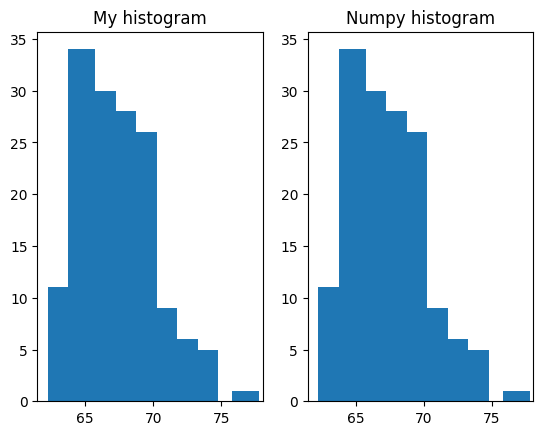

In [79]:
# get data from file
histogram_data = np.loadtxt("hw1_input_data/histogram_data.txt")

# emxaple
numpy_histogram = np.histogram(histogram_data, bins=10)

# show data for numpy histogram
print("The result of np.histogram is: ", numpy_histogram[0])
# note: the result of np.histogram is the number of data in each bin
# which mean like 1st bin has 11 data, 2nd bin has 34 data, etc.

# in detail, np.arange(10) will return evenly spaced values within a given interval -> in this case, it will return 0 to 9
# np.arange(10) is the x-axes -> bin
# numpy_histogram[0] is the y-axes -> number of data points in each bin
# width=1 is the width of each bin

# plot the histogram
plt.figure()  # create a new figure
# my own histogram
my_histogram = compute_histogram(histogram_data, nbins=10)

# we will graph it side by side to compare the result of my function and np.histogram function to see if they are the same
# & we will using plt.hist to graph the histogram
# ref: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
plt.subplot(1, 2, 1)  # create a subplot

# graph my histogram
plt.hist(
    # my_histogram[1][:-1] is the x-axes -> bin -> from 0 to 9
    my_histogram[1][:-1],
    bins=my_histogram[1],  # my_histogram[1] is the bin edges
    weights=my_histogram[0],  # my_histogram[0] is the number of data points in each bin
    width=2,  # width of each bin
)  # graph my histogram
plt.title("My histogram")  # title of the graph

# graph np.histogram
plt.subplot(1, 2, 2)  # create a subplot
plt.hist(
    numpy_histogram[1][:-1],
    bins=numpy_histogram[1],
    weights=numpy_histogram[0],
    width=2,
)  # graph np.histogram
plt.title("Numpy histogram")  # title of the graph

# show the plot
plt.show()

# Problem 3 [25 points]

We are going to practice linear interpolation in 2 dimensions. We talked about interpolating in 1-d in class, and this is a natural step on the way up to $n$-dimensional interpolation.

## Problem 3.a [10 points]

Write your own function for linearly interpolating data in two dimensions. This function should take as arguments:

-  Desired $x$-coordinate(s)
-  Desired $y$-coordinate(s)
-  Input 1-d grid of $x$-coordinates for which the function is defined
-  Input 1-d grid of $y$-coordinates for which the function is defined
-  Input 2-d grid of function values where the function is defined/evaluated
   As output, your function should return:
-  The linearly interpolated value for a $z$-coordinate that corresponds to the input $x$- and $y$-values.


In [4]:
# def interp2d(xWant, yWant, xGrid, yGrid, data):
#     # reference: https://x-engineer.org/bilinear-interpolation/
#     # reference: https://en.wikipedia.org/wiki/Bilinear_interpolation
#
#     # Find the indices of the nearest x and y values in the grid
#     xIndex = np.searchsorted(xGrid, xWant, side="right") - 1
#     yIndex = np.searchsorted(yGrid, yWant, side="right") - 1
#
#     # print("xIndex: ", xIndex)
#     # print("yIndex: ", yIndex)
#
#     # find the x and y values of the four nearest data points
#     # we also make sure that it is not out of bound
#     if xIndex < 0:
#         xIndex = 0
#     elif xIndex >= len(xGrid) - 1:
#         xIndex = len(xGrid) - 2
#     if yIndex < 0:
#         yIndex = 0
#     elif yIndex >= len(yGrid) - 1:
#         yIndex = len(yGrid) - 2
#     x1 = xGrid[xIndex]
#     x2 = xGrid[xIndex + 1]
#     y1 = yGrid[yIndex]
#     y2 = yGrid[yIndex + 1]
#
#     # print("x1: ", x1)
#     # print("x2: ", x2)
#     # print("y1: ", y1)
#     # print("y2: ", y2)
#     # print("xWant: ", xWant)
#     # print("yWant: ", yWant)
#
#     # find the function values of the four nearest data points
#     # we also make sure that it is not out of bound
#     f11 = data[yIndex, xIndex]
#     f12 = data[yIndex, xIndex + 1]
#     f21 = data[yIndex + 1, xIndex]
#     f22 = data[yIndex + 1, xIndex + 1]
#
#     # R1(x, y) = f11 · (x2 – x) / (x2 – x1) + f21 · (x – x1) / (x2 – x1)
#     R1 = f11 * (x2 - xWant) / (x2 - x1) + f21 * (xWant - x1) / (x2 - x1)
#     # R2(x, y) = f12 · (x2 – x) / (x2 – x1) + f22 · (x – x1) / (x2 – x1)
#     R2 = f12 * (x2 - xWant) / (x2 - x1) + f22 * (xWant - x1) / (x2 - x1)
#     # P(x, y) =  R1 · (y2 – y) / (y2 – y1) + R2 · (y – y1) / (y2 – y1)
#     P = R1 * (y2 - yWant) / (y2 - y1) + R2 * (yWant - y1) / (y2 - y1)
#
#     # Return the interpolated value
#     return P

In [67]:
def interp2d(xWant, yWant, xGrid, yGrid, data):
    """
    Interpolate a 2D function using bilinear interpolation.

    Parameters
    ----------
    xWant : float
        The x-coordinate of the point to interpolate.
    yWant : float
        The y-coordinate of the point to interpolate.
    xGrid : array_like
        The x-coordinates of the grid points.
    yGrid : array_like
        The y-coordinates of the grid points.
    data : array_like
        The values of the function at the grid points.

    Returns
    -------
    float
        The interpolated value of the function at the point (xWant, yWant).
    """
    # Check if xGrid and yGrid are empty
    if len(xGrid) == 0 or len(yGrid) == 0:
        return 0.0

    # Find the indices of the grid points surrounding the point to interpolate
    xIndex = np.digitize(xWant, xGrid) - 1
    yIndex = np.digitize(yWant, yGrid) - 1

    # Clip the indices to the valid range
    xIndex = np.clip(xIndex, 0, len(xGrid) - 2)
    yIndex = np.clip(yIndex, 0, len(yGrid) - 2)

    # Get the values of the grid points surrounding the point to interpolate
    x1 = xGrid[xIndex]
    x2 = xGrid[xIndex + 1]
    y1 = yGrid[yIndex]
    y2 = yGrid[yIndex + 1]

    f11 = data[yIndex][xIndex]
    f12 = data[yIndex][xIndex + 1]
    f21 = data[yIndex + 1][xIndex]
    f22 = data[yIndex + 1][xIndex + 1]

    # Compute the interpolated value using bilinear interpolation
    denom = (x2 - x1) * (y2 - y1)
    if denom == 0.0:
        return 0.0
    else:
        f = (
            f11 * (x2 - xWant) * (y2 - yWant)
            + f21 * (xWant - x1) * (y2 - yWant)
            + f12 * (x2 - xWant) * (yWant - y1)
            + f22 * (xWant - x1) * (yWant - y1)
        ) / denom
        return f

## Problem 3.b [10 points]

Read in the $x$-values, $y$-values, and function ($z$) values defined in `interp_xvals.txt`, `interp_yvals.txt`, and `interp_zvals.txt`. Compute the interpolated value for $x = 0.13$ and $y = 2.77$ based on your function defined above.


In [54]:
# read in data
xvals = np.loadtxt("hw1_input_data/interp_xvals.txt")
yvals = np.loadtxt("hw1_input_data/interp_yvals.txt")
zvals = np.loadtxt("hw1_input_data/interp_zvals.txt")

# sort the data
# xvals = np.sort(xvals)
# yvals = np.sort(yvals)

# print("xvals: ", xvals)
# print("yvals: ", yvals)

# for parameters, we have x = x-axes, y = y-axes, xnew = new x-axes, ynew = new y-axes, data = 2d grid of func values
# is defined/evaluated
xWant = 0.13
yWant = 2.77

# result = interp2d(xWant, yWant, xvals, yvals, zvals)
result = interp2d(xWant, yWant, xvals, yvals, zvals)
print(result)

-0.018126134640757876


## Problem 3.c [5 points]

Plot the results of your interpolating function, as well as the results of `scipy.interpolate.interp2d` using `kind='linear'` over the region $x \in [0, 5]$ and $y \in [0, 3]$. You may use either a 3d plot, or a pseudo-color plot.


In [29]:
# use the function interp2d from scipy.interpolate that we name it interp2d_lib
# Call the interp2d_lib function and print the result
from scipy.interpolate import interp2d as interp2d_lib

# use RegularGridInterpolator instead of interp2d
from scipy.interpolate import RegularGridInterpolator as interp2d_lib2

# import it here as it cause few error if we import it at the top

# use interp2d_lib instead of interp2d
lib_result = interp2d_lib(xvals, yvals, zvals, kind="linear")
res = lib_result(xWant, yWant)
print(res)

# use interp2d_lib2 instead of interp2d as old lib is decprecated

[-0.0125973]


In [55]:
# extra stuffs just to test how error my function is
# compute the difference between the two results
diff = result - res
print("diff: ", diff)

# calculate the diff % between the two results
diff_percent = diff / res * 100
print("diff %: ", diff_percent)

# we have diff bc our algorithm is not the same as the algorithm of scipy.interpolate
# prob worse as we just estimate the value of the data point that is nearest to the desired point

diff:  [-0.00552883]
diff %:  [43.88901022]


x:  (25,)
y:  (15,)
X:  (15, 25)
Y:  (15, 25)
Z:  (15, 25)


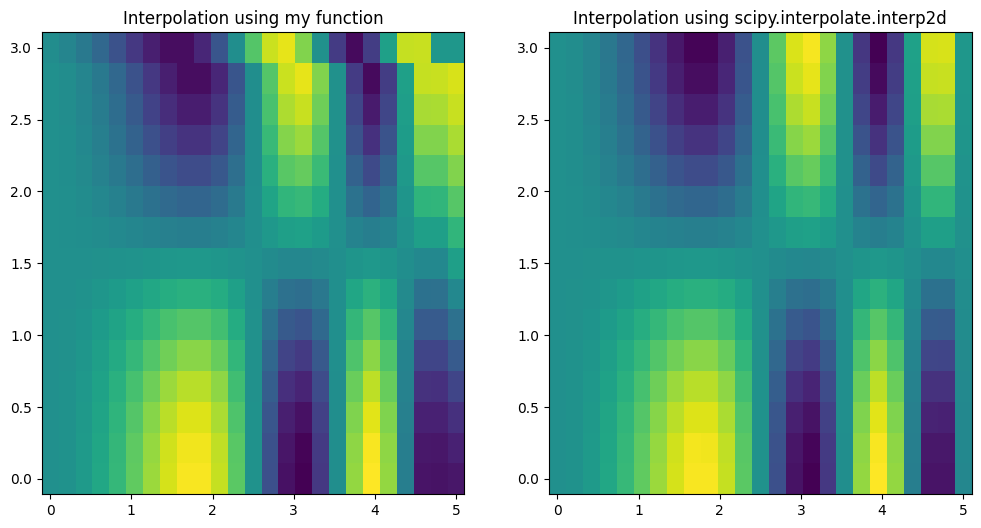

In [69]:
# Redeclare the variables for clarity
x = xvals
y = yvals
X, Y = np.meshgrid(
    x, y
)  # np.meshgrid -> create a rectangular grid out of an array of x values and an array of y values
Z = zvals

# print("x: ", x.shape)
# print("y: ", y.shape)
# print("X: ", X.shape)
# print("Y: ", Y.shape)
# print("Z: ", Z.shape)


# Define the desired x and y coordinates for interpolation
xWant = xvals
yWant = yvals

# Interpolate the data using my function
Z_interp = np.zeros((len(yWant), len(xWant)))
# use nested for loop to get the interpolated value for each point in the grid
for i in range(len(yWant)):
    for j in range(len(xWant)):
        Z_interp[i][j] = interp2d(xWant[j], yWant[i], x, y, Z)

# Interpolate the data using scipy.interpolate.interp2d
f = interp2d_lib(x, y, Z, kind="linear")
Z_interp_lib = f(xWant, yWant)

# Create a pseudo-color plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # subplot for less spacing
# we use pcolormesh as it more avanced than the matplotlib one
# axs[0] is the subplot for my function
# axs[1] is the subplot for scipy.interpolate.interp2d
axs[0].pcolormesh(xWant, yWant, Z_interp, shading="auto")
axs[0].set_title("Interpolation using my function")
axs[1].pcolormesh(xWant, yWant, Z_interp_lib, shading="auto")
axs[1].set_title("Interpolation using scipy.interpolate.interp2d")
plt.show()

# res look off? -> bc the find indices of x and y prob not efficient

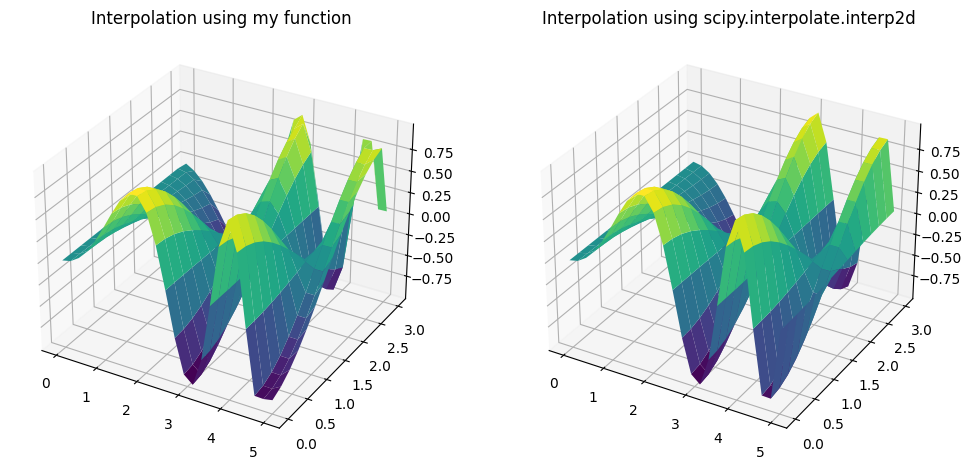

In [85]:
# Create a figure with two subplots 3d just to test how 3d look likes
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={"projection": "3d"})

# Plot the interpolated data using my function
axs[0].plot_surface(X, Y, Z_interp, cmap="viridis")
axs[0].set_title("Interpolation using my function")

# Plot the interpolated data using scipy.interpolate.interp2d
axs[1].plot_surface(X, Y, Z_interp_lib, cmap="viridis")
axs[1].set_title("Interpolation using scipy.interpolate.interp2d")

# Show the plot
plt.show()

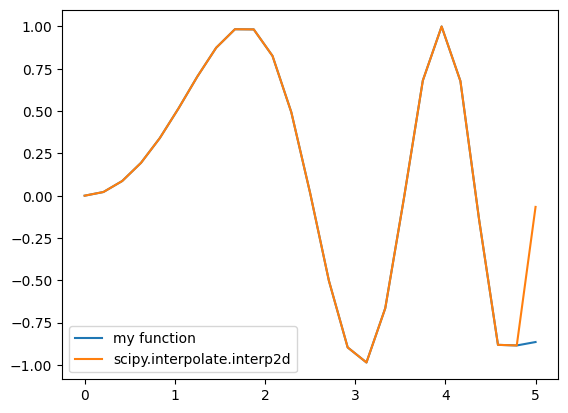

In [86]:
# try again with line graph in same figure as we need to see how off my func is
plt.figure()  # create a new figure
plt.plot(xWant, Z_interp[0], label="my function")  # plot my function
plt.plot(xWant, Z_interp_lib[0], label="scipy.interpolate.interp2d")  # plot scipy
plt.legend()  # show the legend
plt.show()  # show the plot

# good thing from this plot is that it seem all other points are the same except those near end

# Problem 4 [35 points]

We are going to analyze a sample dataset, and go through some typical analysis steps that might be done.

## Part 4.a [5 points]

Read in the dataset `particle_data.txt` These represent measurements of particle velocities from an experimental apparatus we have, in cm/s.


In [106]:
particle_data = np.loadtxt("hw1_input_data/particle_data.txt")

## Part 4.b [5 points]

Compute the mean, standard deviation, and median of the dataset. Note that you should compute these quantities using **code that you write yourself** (the use of built-in Python functions is allowed), but you _may_ check your answers using functions available from NumPy.


In [107]:
# No reference for formula as it is basic math -> change name as my python is err if I use the same name
def my_mean(data):
    # calculate mean of the data by manually calculate it
    # can't use numpy mean function
    sum_data = 0
    for i in range(len(data)):
        # find the sum of the data
        sum_data += data[i]

    # return the mean of the data
    return sum_data / len(data)


def my_std(data):
    # calculate standard deviation of the data by manually calculate it
    # can't use any numpy function -> only build in python lib
    # std = sqrt(sum((data - mean(data))**2) / (len(data) - 1))

    # find the mean of the data
    mean_data = my_mean(data)

    # find the sum of the data
    sum_data = 0
    for i in range(len(data)):
        # find the sum of the data
        sum_data += (data[i] - mean_data) ** 2

    # manually doing the square root
    std_data = sum_data / (len(data) - 1)
    std_data = std_data**0.5

    # return the standard deviation of the data
    return std_data


def my_median(data):
    # calculate median of the data by manually calculate it
    # median = (data[(len(data) - 1) // 2] + data[len(data) // 2]) / 2

    # sort the data
    data.sort()

    # find the median of the data
    median_data = (data[(len(data) - 1) // 2] + data[len(data) // 2]) / 2

    # return the median of the data
    return median_data


# round and new line them for readability
print(
    "my mean function: ",
    round(my_mean(particle_data), 3),
    "\nnp.mean function: ",
    round(np.mean(particle_data), 3),
)
print(
    "my std function: ",
    round(my_std(particle_data), 3),
    "\nnp.std function: ",
    round(np.std(particle_data), 3),
)
print(
    "my median function: ",
    round(my_median(particle_data), 3),
    "\nnp.median function: ",
    round(np.median(particle_data), 3),
)

my mean function:  0.048 
np.mean function:  0.048
my std function:  4.792 
np.std function:  4.792
my median function:  0.002 
np.median function:  0.002


## Part 4.c [5 points]

Compute the PDF of the data. Make sure that it is normalized (i.e., that $\int \mathrm{d}x \; \mathrm{PDF}(x) = 1$). Make a plot of the PDF of the interval spanned by the data.


In [108]:
def calc_pdf(data):
    # reference: from Dr.Paul meeting
    # calculate the histogram
    hist, bins = np.histogram(data, bins=50, density=True)

    # calculate the bin width -> why -> bc we need to normalize the PDF
    bin_width = bins[1] - bins[0]

    # calculate the PDF
    pdf = hist / (len(data) * bin_width)

    # calculate the integral of the PDF to normalize
    integral = np.sum(pdf * bin_width)

    # normalize the PDF
    pdf = pdf / integral

    # return the normalized PDF
    return pdf

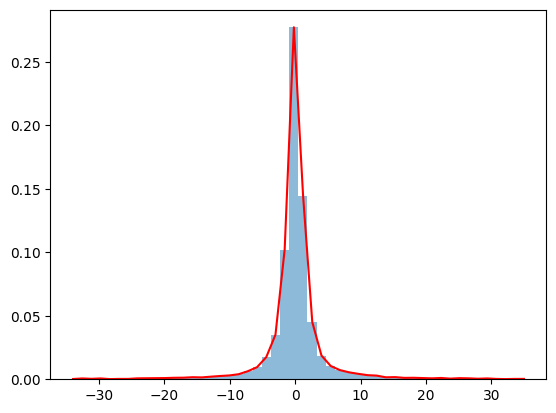

In [109]:
pdf = calc_pdf(particle_data)

# plot the histogram and PDF
fig, ax = plt.subplots()
ax.hist(particle_data, bins=50, density=True, alpha=0.5)
ax.plot(np.linspace(np.min(particle_data), np.max(particle_data), len(pdf)), pdf, "r")
plt.show()

## Part 4.d [5 points]

Compute the CDF of the data. Again, it should be normalized (so that $\mathrm{CDF}(-\infty) = 0$ and $\mathrm{CDF}(+\infty) = 1$). Make a plot over the interval.


In [110]:
def calc_cdf(data):
    # calculate the PDF
    pdf = calc_pdf(data)

    # calculate the CDF from the PDF
    cdf = np.cumsum(pdf)
    # use cumsum bc  it is the cumulative sum of the elements along a given axis
    # reference: https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python

    # normalize the CDF
    # from the above eq
    cdf = (cdf - cdf[0]) / (cdf[-1] - cdf[0])

    # return the normalized CDF
    return cdf

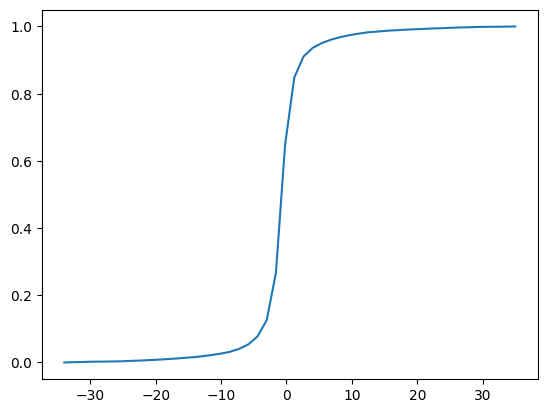

In [111]:
cdf = calc_cdf(particle_data)

# plot the CDF alone
fig, ax = plt.subplots()
ax.plot(np.linspace(np.min(particle_data), np.max(particle_data), len(cdf)), cdf)
plt.show()

## Part 4.e [5 points]

Compare the data with a Gaussian distribution with the same mean and standard deviation as the data. Plot the PDF/histogram of the data against the Gaussian model.


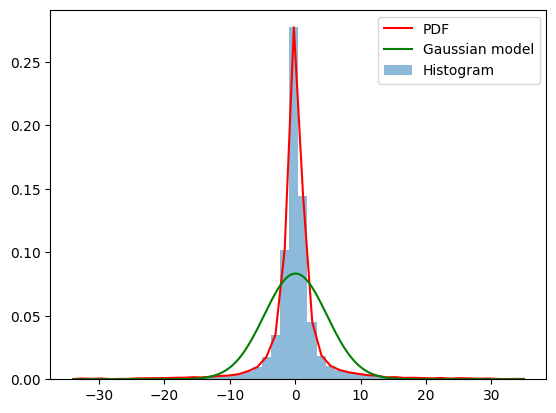

In [112]:
# we will use the gaussian model to compare with the data with same mean and std
# relaod the data

mean_val = my_mean(particle_data)
std_val = my_std(particle_data)
pdf = calc_pdf(particle_data)
gaussian_model = stats.norm.pdf(particle_data, mean_val, std_val)
# stats.norm.pdf -> return the pdf of the normal distribution with mean and std of the data

# plot the histogram and PDF
fig, ax = plt.subplots()
ax.hist(particle_data, bins=50, density=True, alpha=0.5)
ax.plot(np.linspace(np.min(particle_data), np.max(particle_data), len(pdf)), pdf, "r")
ax.plot(particle_data, gaussian_model, "g")
plt.legend(["PDF", "Gaussian model", "Histogram"])
plt.show()

## Part 4.f [5 points]

Use the KS test to determine whether the data are consistent with a Gaussian distribution.

✨ EXTRA CREDIT ✨
If the data are not consistent with a Gaussian, can you find a distribution that is?


In [113]:
# helper func
def test(data, model):
    res = stats.kstest(data, model)
    print("test for ", data, "have res : ", res, "\n")
    # from doc, if the p-value is less than 0.05 -> not consistent
    if res[1] < 0.05:
        print("Not consistent")
    else:
        print("Consistent")

test for  [-33.96466192 -33.34061881 -33.32900069 ...  33.99620744  34.16172619
  34.96330271] have res :  KstestResult(statistic=0.49949093870902056, pvalue=0.0, statistic_location=-0.00023513836179075824, statistic_sign=1) 

Not consistent


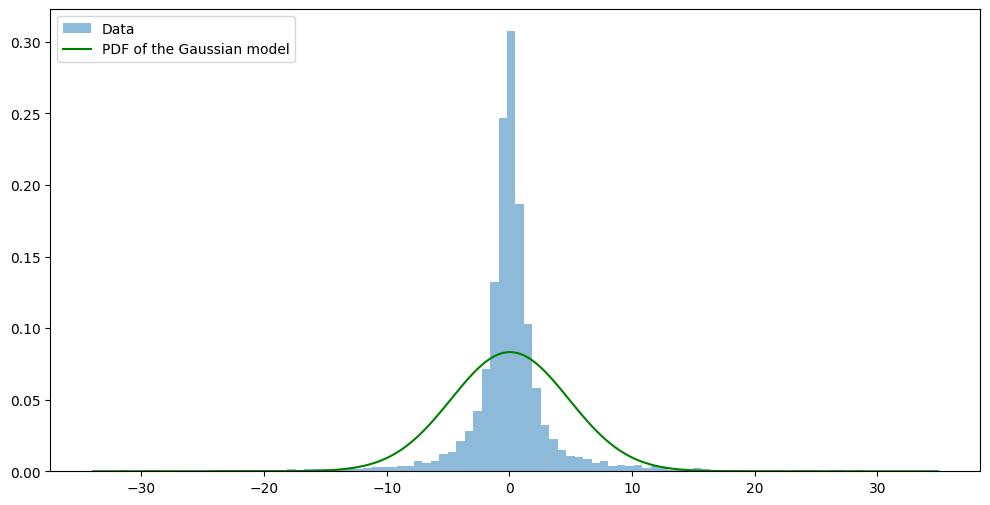

In [114]:
# realod the data
test(particle_data, gaussian_model)


# as it is not consist with gaussian -> we will plot it too see how off it is
plt.figure(figsize=(12, 6))
plt.hist(particle_data, density=True, alpha=0.5, label="Data", bins=100)
plt.plot(
    particle_data, gaussian_model, label="PDF of the Gaussian model", color="green"
)
plt.legend(loc="upper left")
plt.show()

# reference to find new distribution
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

# bc i'm not sure how to do it -> i will just attempting to guess the distribution
# potential distribution: gamma, lognormal, exponential, weibull, power log normal, binomial
# still somewhat symmetric -> mean -> peak

## Part 4.g [5 points]

Compute the (approximate) confidence intervals over which 68% and 95% of the data are distributed.

_Hint_: you can fine the, e.g., 68% confidence interval by finding the value $a$ such that $\mathrm{CDF}(\mu + a) - \mathrm{CDF}(\mu - a) \approx 0.68$, where $\mu$ is the mean of the data.


In [115]:
# helper func that we manually calculate confidence interval
# 2 things: 1/ build appriximation for sparsely sampled func
# 2. fnd where a func is equal to 0
# 0.68 -> 68%
# CDF (data)
def confi_Interval(alpha, mu, sigma):
    # reference for formula: https://www.statisticshowto.com/probability-and-statistics/confidence-interval/
    # && just quick google searhc also give the same formula
    z = np.abs(stats.norm.ppf(1 - alpha / 2))
    lower = mu - z * sigma
    upper = mu + z * sigma
    return lower, upper

In [116]:
# relload data
particle_data = np.loadtxt("hw1_input_data/particle_data.txt")
# load the data again as something happen to the data that cause err
cdf = calc_cdf(particle_data)

# mean  & std
mu = my_mean(particle_data)
sigma = my_std(particle_data)
alpha1 = 0.32
alpha2 = 0.05

stat = stats.norm.interval(0.68, loc=mu, scale=sigma)
manually = confi_Interval(alpha1, mu, sigma)
manually2 = confi_Interval(alpha2, mu, sigma)


print("68% confidence interval from my func: ", manually)
print("68% confidence interval use scipy: ", stat)

stat = stats.norm.interval(0.95, loc=mu, scale=sigma)
print("95% confidence interval from my func: ", manually2)
print("95% confidence interval use scipy: ", stat)

68% confidence interval from my func:  (-4.716915997837792, 4.813878914291416)
68% confidence interval use scipy:  (-4.716915997837792, 4.813878914291418)
95% confidence interval from my func:  (-9.343577817083297, 9.44054073353692)
95% confidence interval use scipy:  (-9.343577817083297, 9.44054073353692)


In [117]:
# the above prob not correct as it not use cdf at all
# we will use cdf to find the confidence interval
def calc_confidence_interval(cdf, mean, alpha, sigma):
    # Find the indices of the two CDF values that bracket the mean
    i = np.searchsorted(cdf, mean, side="right")
    j = i - 1

    # Calculate the slope and intercept of the line between the two CDF values
    slope = (cdf[i - 1] - cdf[j - 1]) / (mean - particle_data[j - 1])
    intercept = cdf[i - 1] - slope * mean

    # Find the value of a such that CDF(mu + a) - CDF(mu - a) is approximately alpha
    a = 0
    while (cdf[i - 1] - cdf[j - 1]) * (a / (mean - particle_data[j - 1])) < alpha:
        a += 0.01

    # Calculate the lower and upper bounds of the confidence interval
    lower = mean - a
    upper = mean + a

    # Return the confidence interval
    return lower, upper

In [118]:
# Calculate the CDF of the particle data
cdf = calc_cdf(particle_data)

# Calculate the mean and standard deviation of the particle data
mean = my_mean(particle_data)
sigma = my_std(particle_data)

# Calculate the 68% confidence interval using the calc_confidence_interval function
alpha = 0.68
lower, upper = calc_confidence_interval(cdf, mean, alpha, sigma)

# Print the confidence interval
print("68% confidence interval: [{:.2f}, {:.2f}]".format(lower, upper))

68% confidence interval: [-9.71, 9.81]


In [120]:
# Generate some sample data with a known mean and standard deviation
# Calculate the CDF of the particle data
cdf = calc_cdf(particle_data)

# Calculate the mean and standard deviation of the particle data
mean = my_mean(particle_data)
sigma = my_std(particle_data)

# Calculate the 68% confidence interval using the calc_confidence_interval function
alpha = 0.68
lower, upper = calc_confidence_interval(cdf, mean, alpha, sigma)
alpha2 = 0.95
lower2, upper2 = calc_confidence_interval(cdf, mean, alpha2, sigma)

# Define the null hypothesis
null_hypothesis = "The true mean is within the confidence interval"

# Define the alternative hypothesis
alternative_hypothesis = "The true mean is outside the confidence interval"

# Print the results of the hypothesis test
if lower <= mean <= upper or lower2 <= mean <= upper2:
    print(null_hypothesis)
else:
    print(alternative_hypothesis)

print("68% confidence interval: [{:.2f}, {:.2f}]".format(lower, upper))
print("95% confidence interval: [{:.2f}, {:.2f}]".format(lower2, upper2))

# test them with scipy
# Calculate the CDF of the particle data
stat = stats.norm.interval(0.68, loc=mu, scale=sigma)
stat2 = stats.norm.interval(0.95, loc=mu, scale=sigma)
print("68% confidence interval use scipy: ", stat)
print("95% confidence interval use scipy: ", stat2)
# hmmm myabe my result is different due to the fact that my pdf and cdf is normalized to the data -> could cause diff
# as my confidence interval using the cdf

The true mean is within the confidence interval
68% confidence interval: [-9.71, 9.81]
95% confidence interval: [-13.58, 13.68]
68% confidence interval use scipy:  (-4.716915997837792, 4.813878914291418)
95% confidence interval use scipy:  (-9.343577817083297, 9.44054073353692)
